In [2]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import nltk
from scipy.stats import itemfreq
import pycountry
import matplotlib.pyplot as plt
%matplotlib inline

You may need these data

In [3]:
nltk.download('twitter_samples'),nltk.download('opinion_lexicon'), nltk.download("vader_lexicon")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/helie/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/helie/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/helie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(True, True, True)

In [4]:
current_directory = 'hillary-clinton-emails/'
df = pd.read_csv(current_directory + 'Emails.csv', index_col=0)
df.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


---
# Word Cloud

In [5]:
def plot_word_cloud(wordcloud):
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## Generate word cloud on raw corpus

First, we generate a wordcloud on raw corpus. The corpus we used here is `ExtractedBodyText` column in the `Eamil.csv`. As `WordCloud` will use default stopwords for filtering even if we didn't want, we have to manually set the stopwords to empty.

In [6]:
all_body_text = (df.loc[:, 'ExtractedBodyText'].dropna()).sum()

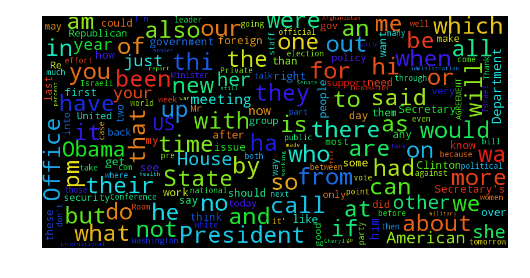

In [7]:
wordcloud = WordCloud(max_font_size=40, width=800, height=400)
wordcloud.stopwords = {}
wordcloud = wordcloud.generate(all_body_text)
plot_word_cloud(wordcloud)

## Generate word cloud with preprocessing

### Preprocessing Strategies

1. filter out some email word like `fw`, `fwd`, `subject` and so on
2. case folding: reduce all letters to lower case
3. ignoring punctuates

TODO: (maybe)

1. Try Lemmatization
2. Try Stemming

##### Remove Punctuation

In [8]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans({key: '' for key in string.punctuation}))

##### Generate stopwords

In [9]:
email_word_list = ['fw', 'fwd', 'subject', 'to', 're', 'pm', 'will', 'case', 'also', 're', 'call', 'may', 'mr', 'ms', 'mrs']
stopwords = set(email_word_list).union(set(STOPWORDS))

##### Processing words

In [10]:
# Concatenate all the Extracted Body Text
txt = (df.loc[:, 'ExtractedBodyText'].dropna()).sum()
txt = remove_punctuation(txt)
tokens = nltk.word_tokenize(txt)
tokens = [i.lower() for i in tokens if i.lower() not in stopwords]
tokens_freq = itemfreq(tokens)
tokens, tokens_freq = tokens_freq[:, 0], tokens_freq[:, 1].astype(int)
tokens_x_freq = [(tokens[i], tokens_freq[i]) for i in range(len(tokens))]

##### Create word cloud

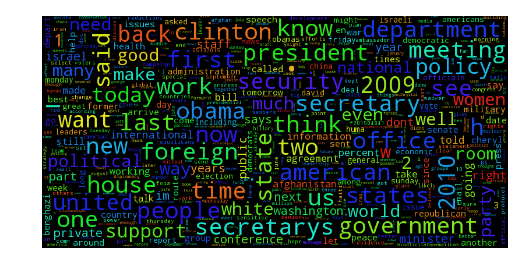

In [11]:
wordcloud = WordCloud(max_font_size=40, 
                      stopwords=STOPWORDS, 
                      width=800, 
                      height=400,
                     max_words=500).generate_from_frequencies(tokens_x_freq)
plot_word_cloud(wordcloud)

In the above wordcloud, we find words like `government`, `department`, `obama`, `policy`, `office`, `meeting` are very common in this cloud. It is reasonable to think that Hillary Clinton uses her private email server for official communications which may leak top secret of america.

#### Stemming

In [12]:
from nltk.stem import PorterStemmer, SnowballStemmer

pt = PorterStemmer()
text = 'Clarissa risca com giz no quadro-negro a paisagem que os alunos devem copiar . Uma casinha de porta e janela , em cima duma coxilha .'
for token in text.split():
    print(pt.stem(token))

Clarissa
risca
com
giz
no
quadro-negro
a
paisagem
que
os
aluno
devem
copiar
.
Uma
casinha
de
porta
e
janela
,
em
cima
duma
coxilha
.


In [13]:
pt = SnowballStemmer('english')
def compare_stem(word1, word2):
    """if two words have same """
    print(pt.stem(word1))
    print(pt.stem(word2))
    return pt.stem(word1) ==  pt.stem(word2)

### Conclusion

The first approach creates a wordcloud on raw corpus. It is very easy to use and reflects the frequencies of the words in the data. However, it has many disadvantages. Words like `a, the, be` ... dominates the screen. These words are frequently used in any context and they didn't provide useful information about the topic of email. Besides, words are not normalized.

The second approach will process data first. By adding stopwords, tokenization, and stemming, we see a graph with much better results. Now it is much easier to know the topics of these emails without effort.

## Exercise 2

Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?


### Mentioned countries
1. convert to lower case and tokenize all the body text.
2. intersect body text with country names in lowercase. 
3. intersect body text with country abbreviations in lowercase.
4. union all the mentioned countries and make it unique

Difficulties:

1. Some of abbreviations `alpha_2` and `alpha_3` has other meanings.
   1. 'PM' refers to 'saint pierre and miquelon'
   2. Norway alpha_2='NO'
   and so on
   
   It is reasonable to believe, people will not refer to misleading abbreviations in their emails. In fact, after checking the coutries found by `alpha_2`, `alpha_3`, we found only very very few countries will be refer in abbreviation and most of the times it is `U.S.`. So we only add some special cases rather than checkout all of them.

2. Some countries are usually refered in a way which different from `name/alpha_2/alpha_3`.

    For example, Syria is not listed because its name is `Syrian Arab Republic`, and Russia is `Russian federal`.
    The same case happen to some other place.

    We will add special cases to it.

3. include special case  EU, U.N., Benghazi

In [14]:
# Map Country names
country_abbreviations_alpha_2 = [i.alpha_2 for i in pycountry.countries]
country_abbreviations_alpha_3 = [i.alpha_3 for i in pycountry.countries]
country_abbreviations_name    = [i.name for i in pycountry.countries]

def get_common_name_map():
    common_name_map = dict()
    common_name_map['syrian'] = 'Syrian Arab Republic'
    common_name_map['syria']  = 'Syrian Arab Republic'
    common_name_map['russia'] = 'Russian Federation'
    common_name_map['u.s.']   = 'United States'
    
    common_name_map['u.n.']     = 'UN'
    common_name_map['benghazi'] = 'Libya'
    common_name_map['eu']       = 'EU'

    for name in country_abbreviations_name:
        common_name_map[name.lower()] = name
        
    return common_name_map

common_name_map = get_common_name_map()

In [15]:
def tokenize_text(txt):
    return nltk.word_tokenize(txt)

def find_countries_in_text(tokenized_txt, country_list = common_name_map.keys()):
    lower_tokenized_text = set([i.lower() for i in tokenized_txt])
    return lower_tokenized_text.intersection(country_list)

In [16]:
tokenized_body_text = nltk.word_tokenize(all_body_text)
lower_tokenized_text = set([i.lower() for i in tokenized_body_text])

In [17]:
countries_found = find_countries_in_text(lower_tokenized_text, common_name_map.keys())
[common_name_map[c] for c in countries_found]

['Denmark',
 'Angola',
 'Pakistan',
 'Peru',
 'Georgia',
 'Qatar',
 'Bangladesh',
 'Suriname',
 'Kazakhstan',
 'India',
 'Nepal',
 'Afghanistan',
 'Finland',
 'Cyprus',
 'Egypt',
 'Syrian Arab Republic',
 'Guam',
 'Norway',
 'Nicaragua',
 'UN',
 'Belarus',
 'Estonia',
 'Cameroon',
 'Cambodia',
 'Colombia',
 'Iraq',
 'Kenya',
 'Samoa',
 'Liberia',
 'Panama',
 'Albania',
 'Uganda',
 'Monaco',
 'Greenland',
 'Libya',
 'Uruguay',
 'Congo',
 'Uzbekistan',
 'Nigeria',
 'Iceland',
 'Guinea',
 'Jordan',
 'Turkmenistan',
 'Austria',
 'Zambia',
 'Ecuador',
 'Hungary',
 'Libya',
 'Jamaica',
 'Slovakia',
 'Antarctica',
 'Luxembourg',
 'Latvia',
 'Philippines',
 'Bahamas',
 'Cuba',
 'Mozambique',
 'Bahrain',
 'Serbia',
 'Lithuania',
 'Sweden',
 'Senegal',
 'Netherlands',
 'Azerbaijan',
 'Syrian Arab Republic',
 'China',
 'Maldives',
 'Madagascar',
 'Thailand',
 'Turkey',
 'Romania',
 'Somalia',
 'Rwanda',
 'Singapore',
 'Myanmar',
 'Yemen',
 'Oman',
 'Ireland',
 'Niger',
 'Portugal',
 'Germany',
 '

### Sentiment analysis

`nltk.sentiment.util.demo_vader_instance` is used to analyse the polarity and sentiment of each

In [18]:
from nltk.sentiment import util
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
extrected_body_text_series = df.loc[:, 'ExtractedBodyText'].dropna()

In [20]:
def map_email_bodies_to_countries(email_bodies):
    """
    Parameters
    ----------
    email_bodies : pandas.Series
    
    Return
    ------
    country_to_emails : dict
        map lowercase country names to a list of indices of emails which mentions this country.
    
    """
    assert(email_bodies.dropna().shape == email_bodies.shape)
    country_to_emails = dict(zip(set(common_name_map.values()), [[ ] for i in range(len(common_name_map.values()))]))
    emails_to_country = dict(zip(set(email_bodies.index), [[ ] for i in range(len(email_bodies.index))]))

    for idx in email_bodies.index:
        email = tokenize_text(email_bodies.loc[idx])
        countries = find_countries_in_text(email)
        for c in countries:
            country_to_emails[common_name_map[c]].append(idx)
            emails_to_country[idx].append(common_name_map[c])
            
    return country_to_emails, emails_to_country

In [21]:
map_coutry_to_emails, map_emails_to_country = map_email_bodies_to_countries(extrected_body_text_series)

In [22]:
map_coutry_to_num_emails = dict()
for c in map_coutry_to_emails.keys():
    map_coutry_to_num_emails[c] = len(map_coutry_to_emails[c])

In [23]:
country_num_emails_df = pd.DataFrame(list(map_coutry_to_num_emails.items()), columns=['country', 'num'])
country_num_emails_df.set_index('country', inplace=True)
country_num_emails_df.head()

,num
country,
Timor-Leste,0
Sri Lanka,0
Nicaragua,1
Jamaica,4
Switzerland,4


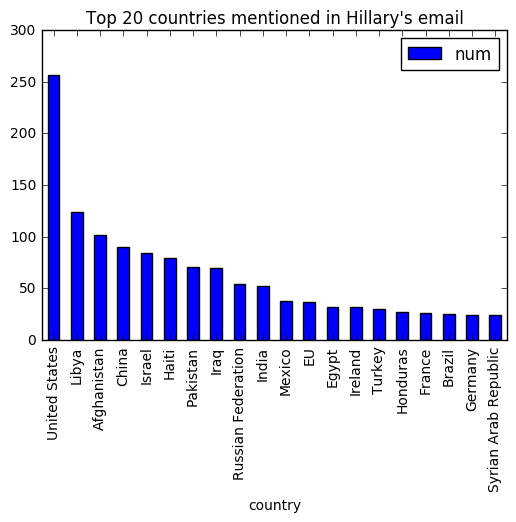

In [24]:
country_num_emails_df.sort_values('num', ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 countries mentioned in Hillary's email")
plt.show()

In [25]:
def map_email_to_vader_sentiment(emails):
    polarity_score = dict()
    for idx in emails.index:
        txt = emails.loc[idx]
        polarity_score[idx] = vader_analyzer.polarity_scores(txt)
    
    return polarity_score

It may take some time...

In [26]:
import pickle
import os

if os.path.exists("map_idx_to_sentiment.pickle"):
    with open('map_idx_to_sentiment.pickle', 'rb') as handle:
        map_idx_to_sentiment = pickle.load(handle)
else:
    map_idx_to_sentiment = dict()
    map_idx_to_sentiment['vader'] = map_email_to_vader_sentiment(extrected_body_text_series)
    with open('map_idx_to_sentiment.pickle', 'wb') as handle:
        pickle.dump(map_idx_to_sentiment, handle)

In [27]:
map_idx_to_sentiment['vader'][2]

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [28]:
map_emails_to_country[2]

['Libya', 'Syrian Arab Republic']

In [29]:
a = map_idx_to_sentiment['vader'][2].values()

In [31]:
[i for i in map_idx_to_sentiment['vader'][2].values()]

[1.0, 0.0, 0.0, 0.0]

In [32]:
def extract_senti(idx, senti):
    return [idx, senti['compound'], senti['neg'], senti['pos'], senti['neu']]

In [33]:
a = np.array([extract_senti(idx, senti) for idx, senti in map_idx_to_sentiment['vader'].items()])

In [34]:
pd.DataFrame(list(map_idx_to_sentiment['vader'][2].items()))

,0,1
0,neu,1.0
1,neg,0.0
2,compound,0.0
3,pos,0.0


In [38]:
compound = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neg   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
pos   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neu   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
count = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))

for idx, senti in map_idx_to_sentiment['vader'].items():
    for c in map_emails_to_country[idx]:
        compound[c] += senti['compound']
        neg[c] += senti['neg']
        pos[c] += senti['pos']
        neu[c] += senti['neu']
        count[c] += 1
        
for c, num in count.items():
    if num > 0:
        compound[c] = compound[c] / num
        neg[c] = neg[c] / num
        pos[c] = pos[c] / num
        neu[c] = neu[c] / num

In [40]:
a = []

for c, num in count.items():
    a.append((c, compound[c], neg[c],pos[c], neu[c], num))
    
country_x_senti = pd.DataFrame(a, columns=['country', 'compound', 'neg', 'pos', 'neu', 'num'])
country_x_senti.set_index('country', inplace=True)
country_x_senti.head()

,compound,neg,pos,neu,num
country,,,,,
Timor-Leste,0.00000,0.00000,0.00000,0.00000,0.0
Sri Lanka,0.00000,0.00000,0.00000,0.00000,0.0
Nicaragua,0.00000,0.00000,0.00000,1.00000,1.0
Jamaica,-0.07680,0.01025,0.05450,0.93525,4.0
Switzerland,0.49155,0.07075,0.10025,0.82900,4.0


In [52]:
top_countries = country_x_senti[country_x_senti.num > 5]
top_countries.head()

,compound,neg,pos,neu,num
country,,,,,
Qatar,0.526100,0.035692,0.114538,0.849692,13.0
Netherlands,0.030643,0.077429,0.081000,0.841714,7.0
Pakistan,0.314210,0.064465,0.097282,0.838239,71.0
Congo,-0.170800,0.095667,0.080333,0.823833,6.0
Bangladesh,0.263033,0.024833,0.069500,0.905833,6.0


### Overall

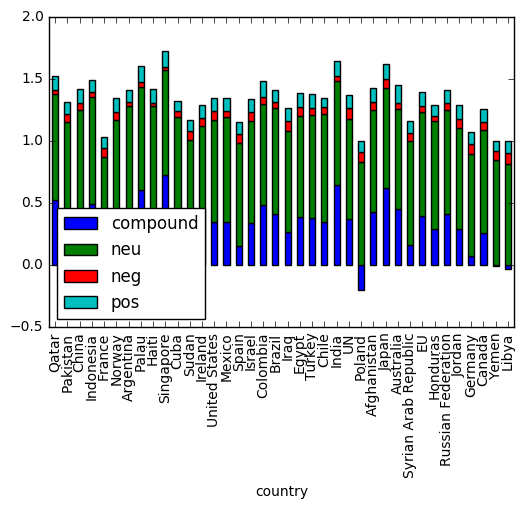

In [57]:
country_x_senti[country_x_senti.num > 10][['compound', 'neu', "neg", "pos"]].plot.bar(stacked=True)

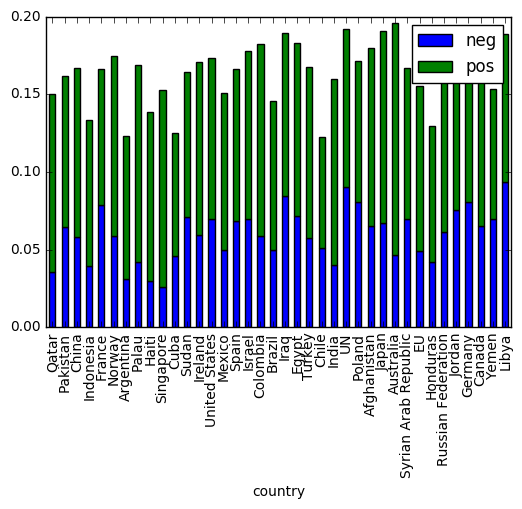

In [58]:
country_x_senti[country_x_senti.num > 10][["neg", "pos"]].plot.bar(stacked=True)

### Most Negative Sentiment countries

We sort the difference  

    neg - pos

to find the most negative sentiment. In this way, we can reduce the bias.

[]

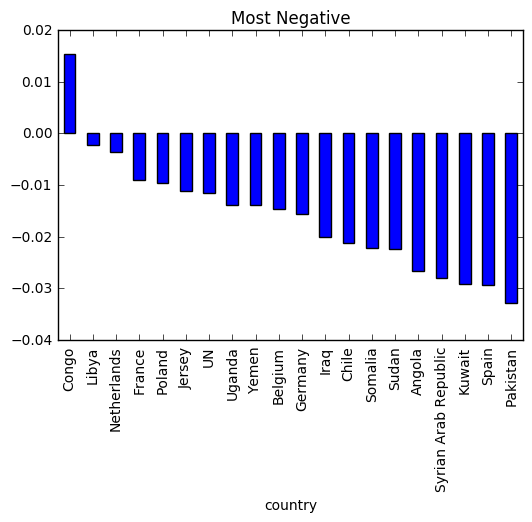

In [86]:
((top_countries['neg'] - top_countries['pos'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Negative')
plt.plot()

It is well-known that `Benghazi attack` (Libya, 2012) is her nightmare. There is no doubt that `Libya` would rank high in this list.

It is very interesting to see that Hillary holds a much more negative view towards `Congo`. When we searched google with keyword `hillary` and `congo`, we find that she and her husband received a very high speaking fee from congo 

[http://www.forbes.com/sites/richardminiter/2016/04/17/why-did-congo-offer-clinton-650000-for-two-pics-and-a-speech/#436be0e33f11](http://www.forbes.com/sites/richardminiter/2016/04/17/why-did-congo-offer-clinton-650000-for-two-pics-and-a-speech/#436be0e33f11)

and a news about Hillary met a rude question in Congo http://thelede.blogs.nytimes.com/2009/08/13/was-hillary-clintons-answer-in-congo-the-right-one/?_r=0

[]

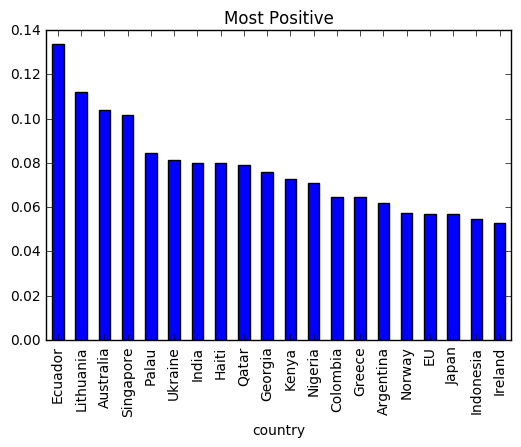

In [87]:
((top_countries['pos'] - top_countries['neg'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Positive')
plt.plot()